In [14]:
#!/usr/bin/env python3
# pip install pandas
# pip install requests
# pip install numpy
# pip install seaborn
# pip install matplotlib
# pip install nbconvert
# pip install reliability
# pip install rpy2
# pip install ipysheet
# pip install tabulate
import os
from IPython.display import HTML, display, JSON, clear_output
import tabulate
from cmath import nan
import jinja2
import os
import pandas as pd
import requests
import json
import py7zr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import time
import datetime
from itertools import groupby
import numpy
from scipy.stats import pearsonr, fisher_exact
import pickle
import _pickle as cPickle
from decimal import *
import arabic_reshaper
# install: pip install python-bidi
from bidi.algorithm import get_display
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw
from scipy.stats import fisher_exact

from statsmodels.graphics.mosaicplot import mosaic

from tqdm import tqdm


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

%matplotlib inline
# session = requests.Session()
# retry = Retry(connect=3, backoff_factor=0.5)
# adapter = HTTPAdapter(max_retries=retry)
# session.mount('http://', adapter)
# session.mount('https://', adapter)


Some helper functions:


In [15]:
with open("../jinja2/data/21.json", "r") as inputFile:
    data = json.load(inputFile)
NormData = pd.json_normalize(data['users'])
# Variables = dict()
Variables = {}


def AddLatexVariable(VarName, VarValue, Var):
    Var[(len(list(Var.keys()))) + 1] = {
        'variableName':
        VarName,
        'variableValue': VarValue
    }



In [16]:
# print([i for i in list(NormData.columns) if i.startswith('Assessment.Assessment')])
print([i for i in list(NormData.columns) if 'Assessment' in i])
print(len(NormData[NormData['Assessment.Assessment.WaitingRoom'] == 'ExitExp']))
print(len(NormData[NormData['Assessment.Assessment.WaitingRoom'] == 'ContinueExp']))

# ContinueExp ExitExp

['Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised', 'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised', 'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised', 'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01', 'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01', 'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01', 'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherNameRevised02', 'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherFamilyNameRevised02', 'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherPhoneNumberRevised02', 'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherNameRevised03', 'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherFamilyNameRevised03', 'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherPhoneNumberRevised03', 'Assessment.Assessment.

In [17]:

#  ! #######################
LabelsUsualSuspects = ['id',
                       'LandingPage.submittime',
                       'Assessment.Assessment.ExperimentGroup',
                       'Assessment.Assessment.ReceiveOtherResultsRequest',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',

                       'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01',

                       'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherNameRevised02',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherFamilyNameRevised02',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherPhoneNumberRevised02',

                       'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherNameRevised03',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherFamilyNameRevised03',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherPhoneNumberRevised03',

                       'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherNameRevised04',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherFamilyNameRevised04',
                       'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherPhoneNumberRevised04',
                       'Assessment.Assessment.WaitingRoom',
                       'Assessment.Assessment.ReceiveOtherResultsRequest',
                       'Assessment.Assessment.SelfEmailANDNewSessionAnnouncement.SelfEmailFromLastForm',
                       'Assessment.Assessment.SelfEmailANDNewSessionAnnouncement.SelfTelegramIDFromLastForm',
                       'Assessment.Assessment.DaysToSendTheMail',
                       'Assessment.Assessment.HourOfDay',

                       'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.AuctionsAgreement',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.CityName',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.EducationQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.InformationQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.JobSatisfaction',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.JobTitle',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.MajorForEducation',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.MajorNameForOther',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.MentalHealthQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.MoneyQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.RelationshipStatus',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.SaftyInLifeQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.SexLifeQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.TotalQualityOfLife',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.UniversityName',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.ّImportanceOfScience',
                       'InterventionQuestionnaire.InterventionQuestionnaireData.DataScieneFamiliarity',
                       'SVOSliderTest.svo',
                       'SVOSliderTest.type',
                       'SVOSliderTest.isConsistent',
                       'SVOSliderTest.selfTotal',
                       'SVOSliderTest.otherTotal',
                       'darktriad.darktriadsurvey.DTriad01Mac01',
                       'darktriad.darktriadsurvey.DTriad02Mac02',
                       'darktriad.darktriadsurvey.DTriad03Mac03',
                       'darktriad.darktriadsurvey.DTriad04Mac04',
                       'darktriad.darktriadsurvey.DTriad05Psy01',
                       'darktriad.darktriadsurvey.DTriad06Psy02',
                       'darktriad.darktriadsurvey.DTriad07Psy03',
                       'darktriad.darktriadsurvey.DTriad08Psy04',
                       'darktriad.darktriadsurvey.DTriad09Nars01',
                       'darktriad.darktriadsurvey.DTriad10Nars02',
                       'darktriad.darktriadsurvey.DTriad11Nars03',
                       'darktriad.darktriadsurvey.DTriad12Nars04',
                       'darktriad.isReversed',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy01',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy02',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy01',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy02',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy01',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy02',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy01',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy02',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy01',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy02',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy01',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy02',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy01',
                       'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy02',
                       'willingnessToPayOthers.attitudeGroupName',
                       'willingnessToPayOthers.attitudeisReversed',
                       'willingnessToPayOthers.normGroupName',
                       'willingnessToPayOthers.normisReversed',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-Attitude',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-AttitudeImportance',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-BehaviorQuestion',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IdentificationwiththeReferent',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IntentionQuestion',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-PerceivedBehavioralControlQuestion',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestion',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionContext',
                       'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionExpert',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',

                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherFamilyName01',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherName01',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherPhoneNumber01',

                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherFamilyName02',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherName02',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherPhoneNumber02',

                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherFamilyName03',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherName03',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherPhoneNumber03',

                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherFamilyName04',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherName04',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherPhoneNumber04',
                       'otherPIIDisClosure.submittime',
                       ]
DFNotRepeatedNoneFilled = NormData.copy()
# print(type(DFNotRepeatedNoneFilled))

# for LabelsUsualSuspect in LabelsUsualSuspects:
#     experiment  = DFNotRepeatedNoneFilled.loc[:, LabelsUsualSuspect]
# experiment  = DFNotRepeatedNoneFilled.loc[:, LabelsUsualSuspects]
experimentCopy = DFNotRepeatedNoneFilled.loc[:, LabelsUsualSuspects]

#  ! #######################

print(len(experimentCopy))
experimentCopy.head().style
# experiment.to_excel("../jinja2/data/experiment16.xlsx")


651


,id,LandingPage.submittime,Assessment.Assessment.ExperimentGroup,Assessment.Assessment.ReceiveOtherResultsRequest,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01,Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01,Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01,Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherNameRevised02,Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherFamilyNameRevised02,Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherPhoneNumberRevised02,Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherNameRevised03,Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherFamilyNameRevised03,Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherPhoneNumberRevised03,Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherNameRevised04,Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherFamilyNameRevised04,Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherPhoneNumberRevised04,Assessment.Assessment.WaitingRoom,Assessment.Assessment.ReceiveOtherResultsRequest,Assessment.Assessment.SelfEmailANDNewSessionAnnouncement.SelfEmailFromLastForm,Assessment.Assessment.SelfEmailANDNewSessionAnnouncement.SelfTelegramIDFromLastForm,Assessment.Assessment.DaysToSendTheMail,Assessment.Assessment.HourOfDay,InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion,InterventionQuestionnaire.InterventionQuestionnaireData.AuctionsAgreement,InterventionQuestionnaire.InterventionQuestionnaireData.CityName,InterventionQuestionnaire.InterventionQuestionnaireData.EducationQuestion,InterventionQuestionnaire.InterventionQuestionnaireData.InformationQuestion,InterventionQuestionnaire.InterventionQuestionnaireData.JobSatisfaction,InterventionQuestionnaire.InterventionQuestionnaireData.JobTitle,InterventionQuestionnaire.InterventionQuestionnaireData.MajorForEducation,InterventionQuestionnaire.InterventionQuestionnaireData.MajorNameForOther,InterventionQuestionnaire.InterventionQuestionnaireData.MentalHealthQuestion,InterventionQuestionnaire.InterventionQuestionnaireData.MoneyQuestion,InterventionQuestionnaire.InterventionQuestionnaireData.RelationshipStatus,InterventionQuestionnaire.InterventionQuestionnaireData.SaftyInLifeQuestion,InterventionQuestionnaire.InterventionQuestionnaireData.SexLifeQuestion,InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion,InterventionQuestionnaire.InterventionQuestionnaireData.TotalQualityOfLife,InterventionQuestionnaire.InterventionQuestionnaireData.UniversityName,InterventionQuestionnaire.InterventionQuestionnaireData.ّImportanceOfScience,InterventionQuestionnaire.InterventionQuestionnaireData.DataScieneFamiliarity,SVOSliderTest.svo,SVOSliderTest.type,SVOSliderTest.isConsistent,SVOSliderTest.selfTotal,SVOSliderTest.otherTotal,darktriad.darktriadsurvey.DTriad01Mac01,darktriad.darktriadsurvey.DTriad02Mac02,darktriad.darktriadsurvey.DTriad03Mac03,darktriad.darktriadsurvey.DTriad04Mac04,darktriad.darktriadsurvey.DTriad05Psy01,darktriad.darktriadsurvey.DTriad06Psy02,darktriad.darktriadsurvey.DTriad07Psy03,darktriad.darktriadsurvey.DTriad08Psy04,darktriad.darktriadsurvey.DTriad09Nars01,darktriad.darktriadsurvey.DTriad10Nars02,darktriad.darktriadsurvey.DTriad11Nars03,darktriad.darktriadsurvey.DTriad12Nars04,darktriad.isReversed,willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy01,willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy02,willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy01,willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy02,willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPriv

In [18]:

experimentCopy01 = experimentCopy[pd.to_numeric(experimentCopy[
    'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']) >= 18].copy().dropna(
    subset=['Assessment.Assessment.ExperimentGroup',
     'InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion',
     'Assessment.Assessment.WaitingRoom'])

SexFemaleDF = experimentCopy01.loc[experimentCopy01['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion'] == "Female"]
SexMaleDF = experimentCopy01.loc[experimentCopy01['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion'] == "Male"]
SexNoAnswerDF = experimentCopy01.loc[experimentCopy01[
    'InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion'] == 'NoAnswer']
AllParticipantsCleanedDF = experimentCopy01.copy()
A = AllParticipantsCleanedDF.copy()

# SexFemale
# SexMale
# SexNoAnswer
print('A.shape[0]', AllParticipantsCleanedDF.shape[0])
# AllParticipantsCleanedDF['SVOSliderTest.svo']
# print(list(experimentCopy01.loc['users95',:]))
print('Total Data Records Size', len(experimentCopy))

print('Cleaned Data Sample Size', A.shape[0])
print('Sex Male Size', SexMaleDF.shape[0])
print('Sex Female Size', SexFemaleDF.shape[0])

print('Sex No Answer Size', SexNoAnswerDF.shape[0])
# print('SexNoAnswerDF+',
#       SexNoAnswerDF.shape[0]+SexMaleDF.shape[0]+SexFemaleDF.shape[0])
# AllParticipantsCleanedDF
# 143
# 532
# 112
# 7
# experimentCopy01.loc[:, ['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion',
#                          'InterventionQuestionnaire.InterventionQuestionnaireData.AuctionsAgreement',
#                          'LandingPage.submittime',
#                          'InterventionQuestionnaire.InterventionQuestionnaireData.EducationQuestion',
#                          'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion',
#                          'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',
#                          'otherPIIDisClosure.submittime',
#                          'Assessment.Assessment.ExperimentGroup']].to_excel("../jinja2/data/experiment16Sex.xlsx")


A.shape[0] 191
Total Data Records Size 651
Cleaned Data Sample Size 191
Sex Male Size 85
Sex Female Size 103
Sex No Answer Size 3


In [19]:

# r = session.get('https://www.ponya.ir/api18211/users', verify=False)

# def generate(mean, sd, no):
#     return ([np.round(i)
#             for i in np.random.normal(mean, sd, no) if i >= 0 and i <= 1000][0:[int(np.round(i)) for i in np.random.normal(200, 100, 100) if i >= 0 and i <= 100][1]])
# A
ProsocialAllParticipantsDF = A.loc[
    A['SVOSliderTest.type'] == 'prosocial']
IndividualisticAllParticipantsDF = A.loc[
    A['SVOSliderTest.type'] == 'individualistic']
AltruisticAllParticipantsDF = A.loc[
    A['SVOSliderTest.type'] == 'altruistic']
CompetitiveAllParticipantsDF = A.loc[
    A['SVOSliderTest.type'] == 'competitive']

noOfIndividualisticParticipants = len(IndividualisticAllParticipantsDF)
print('noOfIndividualisticParticipants', noOfIndividualisticParticipants)
noOfCompetitiveParticipants = len(CompetitiveAllParticipantsDF)
print('noOfCompetitiveParticipants', noOfCompetitiveParticipants)
noOfProsocialParticipants = len(ProsocialAllParticipantsDF)
print('noOfProsocialParticipants', noOfProsocialParticipants)
noOfAltruisticParticipants = len(AltruisticAllParticipantsDF)
print('noOfAltruisticParticipants', noOfAltruisticParticipants)
InitialSampleSize = len(A)
print('InitialSampleSize', len(experimentCopy))
# len(NoneSVOTypeDF)
# noOfIndividualisticParticipants #01 - 5
# noOfCompetitiveParticipants #01 - 0
# noOfProsocialParticipants #01 - 14
# noOfAltruisticParticipants #01 - 0
# A
# with open('./log/output.txt', 'w') as f:
#     f.write(str(captured))
A

noOfIndividualisticParticipants 20
noOfCompetitiveParticipants 1
noOfProsocialParticipants 50
noOfAltruisticParticipants 1
InitialSampleSize 651


,id,LandingPage.submittime,Assessment.Assessment.ExperimentGroup,Assessment.Assessment.ReceiveOtherResultsRequest,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01,Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01,Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01,...,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherFamilyName02,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherName02,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherPhoneNumber02,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherFamilyName03,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherName03,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherPhoneNumber03,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherFamilyName04,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherName04,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherPhoneNumber04,otherPIIDisClosure.submittime
4,U1663448380431-12109,2022-9-18 1:29:49,[ScientificDataBenefitGroup02],NoDontWantToGetScientificResultsData,الهه,عباسیان,۰۹۱۷۴۷۵۷۹۲۹,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-18 1:31:32
7,U1663461911757-5137,2022-9-18 5:15:21,[CuriosityDataBenefit04],NoDontWantToGetOtherData,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-18 5:16:0
11,U1663476711594-12233,2022-9-18 9:22:3,[IndividualisticDataBenefit03],YesWantToGet,خاطره,بابایی,۰۹۱۲۳۳۶۲۶۰۴,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-18 9:22:37
12,U1663476930367-12085,2022-9-18 9:25:41,[CuriosityDataBenefit04],NoDontWantToGetOtherData,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-18 9:26:7
13,U1663478965987-6073,2022-9-18 9:59:43,[CuriosityDataBenefit04],NoDontWantToGetOtherData,مریم,علیزاده,۰۹۳۵۶۱۰۱۶۶۱,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-18 10:0:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,U1663684994610-7863,2022-9-20 19:13:19,[IndividualisticDataBenefit03],NoDontWantToGetSelfData,ثنا,جلوند انزاب,09384340961,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-20 19:14:1
642,U1663692620960-8037,2022-9-20 21:20:42,[CuriosityDataBenefit04],NoDontWantToGetOtherData,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-20 21:21:11
644,U1663700607423-12419,2022-9-20 23:33:33,[ScientificDataBenefitGroup02],NoDontWantToGetScientificResultsData,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-20 23:34:27
647,U1663704310349-7827,2022-9-21 0:35:22,[ScientificDataBenefitGroup02],YesWantToGet,,,۰۹۳۸۲۱۰۳۰۲۱,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-9-21 0:36:4


In [20]:
SampleSizeFemale = len(SexFemaleDF)  # 01 - 34
print('SampleSizeFemale', SampleSizeFemale)

SampleSizeMale = len(SexMaleDF)  # 01 - 27
print('SampleSizeMale', SampleSizeMale)


SampleSizeSexualityNoAnswer = len(SexNoAnswerDF)  # 01 - 10
print('SampleSizeSexualityNoAnswer', SampleSizeSexualityNoAnswer)


CleanedSampleSize = len(A)  # 01 - 71
print('CleanedSampleSize', CleanedSampleSize)


sampleAgeMeanFloat = np.mean(
    np.float16(A.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
        ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeMean = np.round(sampleAgeMeanFloat, 2)
print('sampleAgeMean:', sampleAgeMean)

sampleAgeMeanMaleFloat = np.mean(
    np.float16(SexMaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
        ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeMeanMale = np.round(sampleAgeMeanMaleFloat, 2)   # 24.81
print('sampleAgeMeanFemale:', sampleAgeMeanMale)

sampleAgeMeanFemaleFloat = np.mean(
    np.float16(SexFemaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
        ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeMeanFemale = np.round(sampleAgeMeanFemaleFloat, 2)        # 25.62
print('sampleAgeMeanFemale:', sampleAgeMeanFemale)

sampleAgeSDFemaleFloat = np.std(
    np.float16(SexFemaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
        ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeSDFemale = np.round(sampleAgeSDFemaleFloat, 2)        # 8.68
print('sampleAgeSDFemale:', sampleAgeSDFemale)


sampleAgeSDMaleFloat = np.std(
    np.float16(SexMaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
        ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeSDMale = np.round(sampleAgeSDMaleFloat, 2)        # 6.38
print('sampleAgeSDMale:', sampleAgeSDMale)


sampleAgeSDFloat = np.std(
    np.float16(A.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
        ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeSD = np.round(sampleAgeSDFloat, 2)        # 8.9
print('sampleAgeSD:', sampleAgeSD)


ageMax = max(
    np.float16(
        A.dropna(
            subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
        ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
print('ageMax:', ageMax)

ageMin = min(np.float16(
    A.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
    ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
print('ageMin:', ageMin)

ageMaxFemale = max(np.float16(
    SexFemaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
    ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
print('ageMaxFemale:', ageMaxFemale)


ageMinFemale = min(np.float16(
    SexFemaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
    ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
print('ageMinFemale:', ageMinFemale)


ageMaxMale = max(np.float16(
    SexMaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
    ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
print('ageMaxMale:', ageMaxMale)


ageMinMale = min(np.float16(
    SexMaleDF.dropna(
        subset=['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
    ['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
print('ageMinMale:', ageMinMale)


# WTP stats
# میانگین  و انحراف استاندارد همه نمرات از دید شخصی در همه افراد
meanOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection = 43.2
SDOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection = 10.3
# میانگین  و انحراف استاندارد نمرات همه آزمودنی ها به سوالات نیمه اول ارزش خود
meanOfSelfWTPAllTwoParticipantGroupFirstQuestionSection = 43.2
SDOfSelfWTPAllTwoParticipantGroupsFirstQuestionSection = 10.3
# میانگین  و انحراف استاندارد نمرات همه آزمودنی ها به سوالات نیمه دوم ارزش خود
meanOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection = 23.5
SDOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection = 13.3
# پی ولیو برای همبستگی میان نیمه اول و دوم سیاهه برای ارزش گذاری خود
PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation = 0.023
PiersonrValueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation = 0.61

meanOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection = 31.2
SDOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection = 13.1
PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForOtherValuation = 0.012
PiersonRValueForCorrelationBetweenFirstAndSecondPartOfQuestionsforOtherValuation = 0.70

# SampleSizeFemale
# SampleSizeMale
# SampleSizeNoAnswer
# CleanedSampleSize
# sampleAgeMean
# sampleAgeMeanMale
# sampleAgeMeanFemale
# sampleAgeSDFemale
# sampleAgeSDMale
# sampleAgeSD
# ageMax
# ageMin
# ageMaxMale
# ageMinMale
# ageMaxFemale
# ageMinFemale
# sampleAgeMeanFloat
# ACopy = A
# A['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherEmailAddress']
# SampleSizeFemale 143
# SampleSizeMale 112
# SampleSizeSexualityNoAnswer 7
# CleanedSampleSize 532
# sampleAgeMean: nan
# sampleAgeMeanFemale: 27.7
# sampleAgeMeanFemale: 27.81
# sampleAgeSDFemale: 8.18
# sampleAgeSDMale: 8.08
# sampleAgeSD: nan
# ageMax: 51.0
# ageMin: nan
# ageMaxFemale: 47.0
# ageMinFemale: 15.0
# ageMaxMale: 51.0

# with open('./log/output.txt', 'w') as f:
#     f.write(str(captured))


SampleSizeFemale 103
SampleSizeMale 85
SampleSizeSexualityNoAnswer 3
CleanedSampleSize 191
sampleAgeMean: 27.6
sampleAgeMeanFemale: 27.19
sampleAgeMeanFemale: 27.98
sampleAgeSDFemale: 8.43
sampleAgeSDMale: 7.55
sampleAgeSD: 8.02
ageMax: 54.0
ageMin: 18.0
ageMaxFemale: 54.0
ageMinFemale: 18.0
ageMaxMale: 51.0
ageMinMale: 18.0


In [21]:


CleandDataDFForTests = A.copy()
CleandDataDFForPlots = pd.DataFrame()
# CleandDataDFForTests.rename(
#     columns={'SVOSliderTest.type': 'SVO type'}, inplace=True)
# CleandDataDFForTests.rename(
#     columns={'SVOSliderTest.svo': 'SVOScore'}, inplace=True)
CleandDataDFForTests.rename(columns={
    'InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion': 'Sex'}, inplace=True)
CleandDataDFForTests.rename(columns={
    'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion': 'Age'}, inplace=True)
DTRItems = [
    'darktriad.darktriadsurvey.DTriad01Mac01',

    'darktriad.darktriadsurvey.DTriad02Mac02',

    'darktriad.darktriadsurvey.DTriad03Mac03',

    'darktriad.darktriadsurvey.DTriad04Mac04',

    'darktriad.darktriadsurvey.DTriad05Psy01',

    'darktriad.darktriadsurvey.DTriad06Psy02',

    'darktriad.darktriadsurvey.DTriad07Psy03',

    'darktriad.darktriadsurvey.DTriad08Psy04',

    'darktriad.darktriadsurvey.DTriad09Nars01',

    'darktriad.darktriadsurvey.DTriad10Nars02',

    'darktriad.darktriadsurvey.DTriad11Nars03',

    'darktriad.darktriadsurvey.DTriad12Nars04']
DarkTriadMacScoreFactorList = ['darktriad.darktriadsurvey.DTriad01Mac01',
                               'darktriad.darktriadsurvey.DTriad02Mac02',
                               'darktriad.darktriadsurvey.DTriad03Mac03',
                               'darktriad.darktriadsurvey.DTriad04Mac04']

DarkTriadPsyScoreFactorList = ['darktriad.darktriadsurvey.DTriad05Psy01',
                               'darktriad.darktriadsurvey.DTriad06Psy02',
                               'darktriad.darktriadsurvey.DTriad07Psy03',
                               'darktriad.darktriadsurvey.DTriad08Psy04']

DarkTriadNarsScoreFactorList = ['darktriad.darktriadsurvey.DTriad09Nars01',
                                'darktriad.darktriadsurvey.DTriad10Nars02',
                                'darktriad.darktriadsurvey.DTriad11Nars03',
                                'darktriad.darktriadsurvey.DTriad12Nars04']

CleandDataDFForTests['DarkTriadScore'] = CleandDataDFForTests[DTRItems].dropna().astype(
    float).sum(axis=1)
CleandDataDFForTests['DarkTriadMacScore'] = CleandDataDFForTests[DarkTriadMacScoreFactorList].dropna().astype(
    float).sum(axis=1)
CleandDataDFForTests['DarkTriadPsyScore'] = CleandDataDFForTests[DarkTriadPsyScoreFactorList].dropna().astype(
    float).sum(axis=1)
CleandDataDFForTests['DarkTriadNarsScore'] = CleandDataDFForTests[DarkTriadNarsScoreFactorList].dropna().astype(
    float).sum(axis=1)

# print(CleandDataDFForTests['DarkTriadScore'])

SVOScore = CleandDataDFForTests['SVOSliderTest.svo'].dropna()
DarkTriadScore = CleandDataDFForTests['DarkTriadScore'].dropna()
DarkTriadMacScore = CleandDataDFForTests['DarkTriadMacScore'].dropna()
DarkTriadPsyScore = CleandDataDFForTests['DarkTriadPsyScore'].dropna()
DarkTriadNarsScore = CleandDataDFForTests['DarkTriadNarsScore'].dropna()
# DarkTriadScore
# SVOAndDTRNaNDroped = pd.conc|t([DarkTriadScore], axis=1)
CleandDataDFForPlots = pd.concat(
    [A,
     DarkTriadScore,
     SVOScore,
     DarkTriadMacScore,
     DarkTriadPsyScore,
     DarkTriadNarsScore], axis=1)
CleandDataDFForPlots.dropna(subset=['Assessment.Assessment.WaitingRoom','DarkTriadScore'],inplace=True)
CleandDataDFForPlots.fillna('', inplace=True)
CleandDataDFForPlots.to_csv(
    "../jinja2/data/CleandDataDFForPlots19.csv", encoding='utf-8', index=True)
print(len(CleandDataDFForPlots))
# print(CleandDataDFForTests[col_list].dropna().astype(
#     float).sum(axis=1))
print(len(
    CleandDataDFForPlots[CleandDataDFForPlots['DarkTriadScore'] == '']['DarkTriadScore']))
print(len(CleandDataDFForPlots[CleandDataDFForPlots['DarkTriadScore']
      == '']['Assessment.Assessment.ExperimentGroup']))


184
0
0


In [22]:

keysPost = [
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherNameRevised02',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherFamilyNameRevised02',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherPhoneNumberRevised02',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherNameRevised03',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherFamilyNameRevised03',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherPhoneNumberRevised03',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherNameRevised04',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherFamilyNameRevised04',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherPhoneNumberRevised04']
keysPre = [
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherName01',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherFamilyName01',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherPhoneNumber01',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherName02',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherFamilyName02',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherPhoneNumber02',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherName03',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherFamilyName03',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherPhoneNumber03',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherName04',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherFamilyName04',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherPhoneNumber04']
AssessInformationStatsAndPlots = dict()
TestGroups = ['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion',
              'InterventionQuestionnaire.InterventionQuestionnaireData.EducationQuestion',
              'InterventionQuestionnaire.InterventionQuestionnaireData.InformationQuestion',
              'InterventionQuestionnaire.InterventionQuestionnaireData.JobSatisfaction',
              'InterventionQuestionnaire.InterventionQuestionnaireData.MajorForEducation',
              'InterventionQuestionnaire.InterventionQuestionnaireData.MentalHealthQuestion',
              'InterventionQuestionnaire.InterventionQuestionnaireData.MoneyQuestion',
              'InterventionQuestionnaire.InterventionQuestionnaireData.RelationshipStatus',
              'InterventionQuestionnaire.InterventionQuestionnaireData.SaftyInLifeQuestion',
              'InterventionQuestionnaire.InterventionQuestionnaireData.SexLifeQuestion',
              'InterventionQuestionnaire.InterventionQuestionnaireData.TotalQualityOfLife',
              'InterventionQuestionnaire.InterventionQuestionnaireData.ّImportanceOfScience',
              'InterventionQuestionnaire.InterventionQuestionnaireData.DataScieneFamiliarity',
              'SVOSliderTest.type'
              ]
TestGroupsIntervalExp01 = [
                     'DarkTriadScore',
                     'DarkTriadMacScore',
                     'DarkTriadPsyScore',
                     'DarkTriadNarsScore',
                     ]
TestGroupsIntervalExp02 = ['SVOSliderTest.svo']



In [23]:
# SampleSizeFemale = len(SexFemaleDF)  # 01 - 34
# print('SampleSizeFemale', SampleSizeFemale)

# SampleSizeMale = len(SexMaleDF)  # 01 - 27
# print('SampleSizeMale', SampleSizeMale)


# SampleSizeSexualityNoAnswer = len(SexNoAnswerDF)  # 01 - 10
# print('SampleSizeSexualityNoAnswer', SampleSizeSexualityNoAnswer)


# CleanedSampleSize = len(A)  # 01 - 71
# print('CleanedSampleSize', CleanedSampleSize)
ProessedData = {}
Statistics = pd.DataFrame()
for ScoreName in TestGroupsIntervalExp01:
    Statistics.loc["SampleStatisticsFloat", ScoreName+"_SampleMean"] = np.mean(
        np.float16(CleandDataDFForPlots.dropna(
            subset=[ScoreName])
            [ScoreName]))
    Statistics.loc["SampleStatisticsFloat", ScoreName+"_SampleSD"] = np.std(
        np.float16(CleandDataDFForPlots.dropna(
            subset=[ScoreName])
            [ScoreName]))
    Statistics.loc[
        "SampleStatisticsRound2", ScoreName+"_SampleMean"] = np.round(Statistics.loc[
            "SampleStatisticsFloat", ScoreName+"_SampleMean"],2)
    Statistics.loc[
        "SampleStatisticsRound2", ScoreName+"_SampleSD"] = np.round(Statistics.loc[
            "SampleStatisticsFloat", ScoreName+"_SampleSD"],2)
    # print(Statistics.loc['Means',ScoreName+"_SampleMean"])
ProessedData['Statistics'] = Statistics
ProessedData['Statistics']
# print(Statistics.loc['SDs',ScoreName+"_SampleSD"])
# sampleAgeMeanFemale = np.round(sampleAgeMeanFemaleFloat, 2)        # 25.62
# print('sampleAgeMeanFemale:', sampleAgeMeanFemale)


,DarkTriadScore_SampleMean,DarkTriadScore_SampleSD,DarkTriadMacScore_SampleMean,DarkTriadMacScore_SampleSD,DarkTriadPsyScore_SampleMean,DarkTriadPsyScore_SampleSD,DarkTriadNarsScore_SampleMean,DarkTriadNarsScore_SampleSD
SampleStatisticsFloat,15.8125,6.300781,3.033203,2.771484,5.265625,2.990234,7.515625,3.474609
SampleStatisticsRound2,15.8100,6.300000,3.030000,2.770000,5.270000,2.990000,7.520000,3.470000


In [24]:

OtherPreTest = [
    ['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber'],
    ['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherName01',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherFamilyName01',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText01.otherPhoneNumber01'],
    ['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherName02',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherFamilyName02',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText02.otherPhoneNumber02'],
    ['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherName03',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherFamilyName03',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText03.otherPhoneNumber03'],
    ['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherName04',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherFamilyName04',
     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText04.otherPhoneNumber04']
]
OtherPostTest = [
    ['Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised',
     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised'],
    ['Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01'],
    ['Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherNameRevised02',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherFamilyNameRevised02',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherPhoneNumberRevised02'],
    ['Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherNameRevised03',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherFamilyNameRevised03',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherPhoneNumberRevised03'],
    ['Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherNameRevised04',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherFamilyNameRevised04',
        'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherPhoneNumberRevised04']
]
# the



def EffectResponseFunction(PreTest, PostTest):
    if (PreTest == PostTest and PreTest == '' and PostTest == ''):
        return 'NullNull'
    # elif PreTest == PostTest != '':
    elif (PreTest == PostTest and PreTest != '' and PostTest != ''):
        return 'XX'
    # elif PreTest != PostTest == '':
    elif (PreTest != PostTest and PreTest != '' and PostTest == ''):
        return 'XNull'
    # elif '' == PreTest != PostTest:
    elif (PreTest != PostTest and PreTest == '' and PostTest != ''):
        return 'NullX'
    # elif '' != PreTest != PostTest != '':
    elif (PreTest != PostTest and PreTest != '' and PostTest != ''):
        return 'XY'
    else:
        return 'Unknown'


In [25]:
#  ! Effect and Response Variables 14 Sept 21:36 0001
##############################
EffectResponseDisclosureDF = CleandDataDFForPlots.copy()
EffectAndResponseKeys = ['id',
                         'LandingPage.submittime',
                         'Assessment.Assessment.ExperimentGroup',
                         'Assessment.Assessment.ReceiveOtherResultsRequest',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherNameRevised01',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherFamilyNameRevised01',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther01.otherPhoneNumberRevised01',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherNameRevised02',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherFamilyNameRevised02',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther02.otherPhoneNumberRevised02',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherNameRevised03',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherFamilyNameRevised03',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther03.otherPhoneNumberRevised03',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherNameRevised04',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherFamilyNameRevised04',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther04.otherPhoneNumberRevised04',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.AuctionsAgreement',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.CityName',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.EducationQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.InformationQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.JobSatisfaction',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.JobTitle',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.MajorForEducation',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.MajorNameForOther',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.MentalHealthQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.MoneyQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.RelationshipStatus',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.SaftyInLifeQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.SexLifeQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.TotalQualityOfLife',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.UniversityName',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.ّImportanceOfScience',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.DataScieneFamiliarity',
                         'SVOSliderTest.svo',
                         'SVOSliderTest.type',
                         'SVOSliderTest.isConsistent',
                         'SVOSliderTest.selfTotal',
                         'SVOSliderTest.otherTotal',
                         'darktriad.darktriadsurvey.DTriad01Mac01',
                         'darktriad.darktriadsurvey.DTriad02Mac02',
                         'darktriad.darktriadsurvey.DTriad03Mac03',
                         'darktriad.darktriadsurvey.DTriad04Mac04',
                         'darktriad.darktriadsurvey.DTriad05Psy01',
                         'darktriad.darktriadsurvey.DTriad06Psy02',
                         'darktriad.darktriadsurvey.DTriad07Psy03',
                         'darktriad.darktriadsurvey.DTriad08Psy04',
                         'darktriad.darktriadsurvey.DTriad09Nars01',
                         'darktriad.darktriadsurvey.DTriad10Nars02',
                         'darktriad.darktriadsurvey.DTriad11Nars03',
                         'darktriad.darktriadsurvey.DTriad12Nars04',
                         'darktriad.isReversed',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy02',
                         'willingnessToPayOthers.attitudeGroupName',
                         'willingnessToPayOthers.attitudeisReversed',
                         'willingnessToPayOthers.normGroupName',
                         'willingnessToPayOthers.normisReversed',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-Attitude',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-AttitudeImportance',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-BehaviorQuestion',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IdentificationwiththeReferent',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IntentionQuestion',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-PerceivedBehavioralControlQuestion',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestion',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionContext',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionExpert',
                         ]

ExprimentControlGroups = [
    'Assessment.Assessment.ExperimentGroup',
    'Assessment.Assessment.ReceiveOtherResultsRequest'
]
# AssessInformationStatsAndPlots = dict()
# AssessInformationStatsAndPlots = pd.DataFrame()
EffectiveVariables = ['NullNull', 'NullX',
                      'XNull', 'XX', 'XY', 'Unknown']
# No  , 'TheAnswerIsNo'
EffectiveVariablesResponseGroups = ['NoDontWantToGetSocietalBenefit', 'NoDontWantToGetScientificResultsData',
                                    'NoDontWantToGetSelfData', 'NoDontWantToGetOtherData', 'YesWantToGet', 'Unknown']
EffectiveVariablesExperimentGroups = ['SocietalBenefitGroup01',
                                      'ScientificDataBenefitGroup02',
                                      'IndividualisticDataBenefit03',
                                      'CuriosityDataBenefit04']
CleandDataDFForPlots
# EffectResponseDisclosureDF['TotalNoOfDisclosures'] = EffectResponseDisclosureDF.loc['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName'],
# EffectResponseDisclosureDF.loc['Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised'])

# for Pre, Post in zip(OtherPreTest, OtherPostTest):
#     EffectResponseDisclosureDF.loc[:,f'DisclosureResponse{str(Pre).split(".", -1)[-1]}'] = EffectResponseDisclosureDF.apply(
#         lambda x: EffectResponseFunction(x[Pre], x[Post]), axis=1)
#     print(EffectResponseDisclosureDF[f'DisclosureResponse{Pre}'])
# print(DisclosureDataKeysShort)
# for i in OtherPreTest:
#     print(f'{i}:',EffectResponseDisclosureDF[f'DisclosureResponse{i}'].groupby(f'DisclosureResponse{i}'))
BehaviorCheckDF = pd.DataFrame()

for keyPreGroup, keyPostGroup in zip(OtherPreTest, OtherPostTest):
    for keyPre, keyPost in zip(keyPreGroup, keyPostGroup):
        EffectResponseDisclosureDF[f'BehaviorChange{str(keyPre).split(".", -1)[-1]}'] = CleandDataDFForPlots.apply(
            lambda x: EffectResponseFunction(x[keyPre], x[keyPost]), axis=1)
        # print(EffectResponseDisclosureDF[f'BehaviorChange{str(keyPre).split(".", -1)[-1]}'])
InterestingDetails = ['Assessment.Assessment.WaitingRoom',
                      'Assessment.Assessment.ReceiveOtherResultsRequest',
                      'Assessment.Assessment.SelfEmailANDNewSessionAnnouncement.SelfEmailFromLastForm',
                      'Assessment.Assessment.SelfEmailANDNewSessionAnnouncement.SelfTelegramIDFromLastForm',
                      'Assessment.Assessment.DaysToSendTheMail',
                      'Assessment.Assessment.HourOfDay']
ProessedData['BehaviorMap'] = {}
ProessedData['BehaviorMap']['Numbers'] = {}
# BehaviorCheckResponse = EffectResponseDisclosureDF.loc[
        # EffectResponseDisclosureDF[
        #     'Assessment.Assessment.ReceiveOtherResultsRequest'] == 'NoDontWantToGetSocietalBenefit']
print(EffectResponseDisclosureDF[
            'Assessment.Assessment.ReceiveOtherResultsRequest'])
for EffectiveVariablesExperimentGroup in EffectiveVariablesExperimentGroups:
    BehaviorCheckExpGroup = EffectResponseDisclosureDF.loc[
    EffectResponseDisclosureDF[
        'Assessment.Assessment.ExperimentGroup'] == EffectiveVariablesExperimentGroup]
    ProessedData['BehaviorMap']['Numbers'][f'{BehaviorCheck}ExperimentGroup'] = len(
    BehaviorCheckExpGroup)
# for EffectiveVariablesResponseGroup in EffectiveVariablesResponseGroups:
#     BehaviorCheckResponse = EffectResponseDisclosureDF.loc[
#         EffectResponseDisclosureDF[
#             'Assessment.Assessment.ReceiveOtherResultsRequest'] == EffectiveVariablesResponseGroup]
#     ProessedData['BehaviorMap']['Numbers'][f'{BehaviorCheck}ReceiveOtherResultsRequest'] = len(
#                 BehaviorCheckResponse)
            

for BehaviorCheck in EffectiveVariables:
    BehaviorCatCheck = EffectResponseDisclosureDF.loc[
        EffectResponseDisclosureDF[
                    'BehaviorChangeotherPhoneNumber'] == BehaviorCheck]
    ProessedData['BehaviorMap'][BehaviorCheck] = {}
    ProessedData['BehaviorMap'][BehaviorCheck]['IsolatedDF'] = BehaviorCatCheck
    ProessedData['BehaviorMap']['Numbers'][f'{BehaviorCheck}Number'] = len(
        BehaviorCatCheck)


 
            # print(f'{BehaviorCheck}Number',
            #       ProessedData['BehaviorMap']['Numbers'][f'{BehaviorCheck}Number'])
# print(ProessedData['BehaviorMap'])

# loc
# [i for i in list(EffectResponseDisclosureDF.columns) if 'Revised' in i]

# os.remove("../jinja2/data/EffectResponseDisclosureDF.pickle")
# print(EffectResponseDisclosureDF['DisclosureResponseotherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName'])
# print(EffectResponseDisclosureDF['PIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName'])
# EffectResponseDisclosureDF
# EffectResponseDisclosureDF
# experiment


    Assessment.Assessment.ReceiveOtherResultsRequest  \
4               NoDontWantToGetScientificResultsData   
7                           NoDontWantToGetOtherData   
11                                      YesWantToGet   
12                          NoDontWantToGetOtherData   
13                          NoDontWantToGetOtherData   
..                                               ...   
640                          NoDontWantToGetSelfData   
642                         NoDontWantToGetOtherData   
644             NoDontWantToGetScientificResultsData   
647                                     YesWantToGet   
650                         NoDontWantToGetOtherData   

    Assessment.Assessment.ReceiveOtherResultsRequest  
4               NoDontWantToGetScientificResultsData  
7                           NoDontWantToGetOtherData  
11                                      YesWantToGet  
12                          NoDontWantToGetOtherData  
13                          NoDontWantToGetOtherData

NameError: name 'BehaviorCheck' is not defined

In [ ]:
 ['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
                       'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber']]
# loc
# [i for i in list(EffectResponseDisclosureDF.columns) if 'Revised' in i]

# os.remove("../jinja2/data/EffectResponseDisclosureDF.pickle")
# print(EffectResponseDisclosureDF['DisclosureResponseotherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName'])
# print(EffectResponseDisclosureDF['PIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName'])
# EffectResponseDisclosureDF
# EffectResponseDisclosureDF
# experiment


SyntaxError: unmatched ']' (3363814150.py, line 3)

In [ ]:

#  ! ################################
# with open("../jinja2/data/EffectResponseDF.pickle", "wb") as f:
#     pickle.dump(EffectResponseDF, f)
#  ! ################################
# with py7zr.SevenZipFile("../jinja2/data/EffectResponseDF.7z", 'w') as archive:
#     archive.writeall("../jinja2/data/EffectResponseDF.pickle")
# os.remove("../jinja2/data/EffectResponseDF.pickle")

# with open("../jinja2/data/EffectResponseDF.pickle", "rb") as f:
#     EffectResponseDF = pickle.load(f)
# with py7zr.SevenZipFile("../jinja2/data/EffectResponseDF.7z", 'r') as archive:
#     archive.extractall(path="../jinja2/data")
#  ! ################################
# with open("../jinja2/data/EffectResponseDF.pickle", "rb") as f:
#     EffectResponseDF = pickle.load(f)
#  ! ################################

In [ ]:

def isSignificant(Significancy):
    if Significancy:
        return ("YesItIsSignificant")
    else:
        return ("NoItIsNotInSignificant")


zeros = 0

KeysShort = []
StatTestNames = ['FisherExactTest']
PlotCategories = ['MosaicPlot']
for StatTestName, PlotCategory in zip(StatTestNames, PlotCategories):
    for TestGroup in TestGroups:
        EffectGroupNames = list(
            CleandDataDFForPlots.groupby(TestGroup).first().index)
        for keys in [keysPre, keysPost]:
            for key in tqdm(keys):
                KeyName = str(key)
                AssessInformationStatsAndPlots[KeyName] = dict()
                AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest'] = dict()
                AssessInformationStatsAndPlots[KeyName]['FisherExactTest'][
                    'FisherExactContingencyTable'] = pd.DataFrame()
                AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest']['FisherExactContingencyTable'].at[
                        'Male', 'NotNull'] = len(
                    CleandDataDFForPlots.loc[CleandDataDFForPlots[KeyName].notnull()].loc[
                        CleandDataDFForPlots[TestGroup] == 'Male'])
                AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest']['FisherExactContingencyTable'].at[
                        'Male', 'IsNull'] = (
                    len(CleandDataDFForPlots.loc[CleandDataDFForPlots[KeyName].isnull()].loc[CleandDataDFForPlots[
                        TestGroup] == 'Male']))
                AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest']['FisherExactContingencyTable'].at[
                        'Female', 'NotNull'] = len(
                    CleandDataDFForPlots.loc[CleandDataDFForPlots[KeyName].notnull()].loc[CleandDataDFForPlots[
                        TestGroup] == 'Female'])
                AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest']['FisherExactContingencyTable'].at[
                        'Female', 'IsNull'] = len(
                    CleandDataDFForPlots.loc[CleandDataDFForPlots[KeyName].isnull()].loc[CleandDataDFForPlots[
                        TestGroup] == 'Female'])
                TestGroupShort = TestGroup.split(".", -1)[-1]
                ResponseVariableShort = KeyName.split(".", -1)[-1]
                KeysShort.append(ResponseVariableShort)
                odd_ratio, p_value = fisher_exact(
                    AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['FisherExactContingencyTable'])
                AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['p_value'] = p_value
                AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['odd_ratio'] = odd_ratio
                AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['Significance'] = (
                    p_value < .05)
                # Variables[(len(list(Variables.keys()))) + 1] = {
                #     'variableName':
                #     f'{TestGroupShort}{ResponseVariableShort}{StatTestName}_p_value',
                #     'variableValue': AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['p_value']
                # }
                # Variables[(len(list(Variables.keys()))) + 1] = {
                #     'variableName': f'{TestGroupShort}{ResponseVariableShort}{StatTestName}_odd_ratio',
                #     'variableValue': AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['odd_ratio']}
                # Variables[(len(list(Variables.keys()))) + 1] = {
                #     'variableName': f'{TestGroupShort}{ResponseVariableShort}{StatTestName}Significancy',
                #     'variableValue': isSignificant(AssessInformationStatsAndPlots[KeyName][StatTestName]['Significance'])}

                AddLatexVariable(f'{TestGroupShort}{ResponseVariableShort}{StatTestName}_p_value',
                                 AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['p_value'],
                                 Variables)
                AddLatexVariable(f'{TestGroupShort}{ResponseVariableShort}{StatTestName}_odd_ratio',
                                 AssessInformationStatsAndPlots[KeyName]['FisherExactTest']['odd_ratio'],
                                 Variables)
                AddLatexVariable(f'{TestGroupShort}{ResponseVariableShort}{StatTestName}Significancy',
                                 isSignificant(
                                     AssessInformationStatsAndPlots[KeyName][StatTestName]['Significance']),
                                 Variables)
                AssessInformationStatsAndPlots[KeyName][TestGroupShort] = {}
                AssessInformationStatsAndPlots[KeyName][TestGroupShort][PlotCategory] = {
                }
                At11 = AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest'][
                    'FisherExactContingencyTable'].at['Male', 'NotNull'],
                At12 = AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest'][
                    'FisherExactContingencyTable'].at['Female', 'NotNull'],
                At21 = AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest'][
                    'FisherExactContingencyTable'].at['Male', 'IsNull'],
                At22 = AssessInformationStatsAndPlots[KeyName][
                    'FisherExactTest'][
                    'FisherExactContingencyTable'].at['Female', 'IsNull']
                AssessInformationStatsAndPlots[KeyName][TestGroupShort][PlotCategory] = {
                    ('Male', 'Disclosed'): int(At11[0]),
                    ('Female', 'Disclosed'):  int(At21[0]),
                    ('Male', 'NotDisclosed'): int(At12[0]),
                    ('Female', 'NotDisclosed'): int(At22)
                }
                plt.ioff()
            


  0%|          | 0/15 [00:00<?, ?it/s]


KeyError: 'FisherExactTest'

In [ ]:
                # plt.title = a
                # if (all in [At11, At12, At21, At22] != 0):
                if all(i != 0 for i in [At11[0], At12[0], At21[0], At22]):
                    print(f'{TestGroupShort}_{ResponseVariableShort}{[At11[0], At12[0], At21, At22]}')
                    mosaic(
                        AssessInformationStatsAndPlots[KeyName][TestGroupShort][PlotCategory])
                    plt.title(f'{TestGroupShort}_{ResponseVariableShort}')
                    plt.savefig(
                        f'../img/APlots{TestGroupShort}{ResponseVariableShort}{PlotCategory}.pdf')
                    # plt.clf()
                    plt.close('all')
                else:
                    zeros += 1
print(zeros)


#  ! ################################
len(A)


1


191

In [ ]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:

from rpy2 import robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr, data
import rpy2.robjects.lib.ggplot2 as ggplot2
from rpy2.robjects import pandas2ri
pandas2ri.activate()
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)
# utils.install_packages('ggplot2')
# utils.install_packages('lazyeval')
# utils.install_packages('tidyr')
# datasets = importr('datasets')
# ggplot2 = importr('ggplot2')
# robjects.r('''
#     library('ggplot2')
# ''')
print(len(A))
RDataFrameTestGroups = CleandDataDFForPlots.copy().fillna('').infer_objects().loc[:, TestGroups]
RDataFramekeysPost = CleandDataDFForPlots.copy().fillna('').infer_objects().loc[:, keysPost]
RDataFramekeysPre = CleandDataDFForPlots.copy().fillna('').infer_objects().loc[:, keysPre]
RDataFrameTestGroupsInterval =  CleandDataDFForPlots.copy().fillna('').infer_objects().loc[:,TestGroupsIntervalExp01].astype(str)
SVOAndDTRNaNDroped =CleandDataDFForPlots.copy().fillna('').infer_objects().loc[:,TestGroupsIntervalExp01].astype(str).dropna(subset=['DarkTriadScore'])
 


191


In [ ]:
%%R -i RDataFramekeysPost -w 5 -h 5 --units in -r 200
if(!require(ggplot2)){install.packages("ggplot2")}
if(!require(dplyr)){install.packages("dplyr")}
# if(!require(tidyverse)){install.packages("tidyverse")}
# if(!require(readxl)){install.packages("readxl")}
# if(!require(ggExtra)){install.packages("ggExtra")}
# if(!require(GGally)){install.packages("GGally")}
# if(!require(scatterplot3d)){install.packages("scatterplot3d")}
# if(!require(gvlma)){install.packages("gvlma")}

In [ ]:
%%R -i RDataFramekeysPre -w 5 -h 5 --units in -r 200
testVar<-0

In [ ]:
%%R -i RDataFrameTestGroupsInterval -w 5 -h 5 --units in -r 200
testVar<-0

In [ ]:
%%R -i RDataFrameTestGroups -w 5 -h 5 --units in -r 200
testVar<-0

In [ ]:
%%R -i RDataFrameTestGroups -w 5 -h 5 --units in -r 200
UsualSuspects <- cbind(RDataFrameTestGroups,RDataFrameTestGroupsInterval,RDataFramekeysPre,RDataFramekeysPost)


In [ ]:
%%R -w 5 -h 5 --units in -r 200
# create dummy data
if(!require(dplyr)){install.packages("dplyr")}
library(dplyr)
vec=c(1,3,5,9,38,7,2,4,9,19,19)
# Standard Error (SE)
se = sd(vec) / sqrt(length(vec))
# Confidence Interval (CI)
alpha=0.05
t=qt((1-alpha)/2 + .5, length(vec)-1)   # tend to 1.96 if sample size is big enough
CI=t*se


# !
#Let's build a dataset : height of 10 sorgho and poacee sample in 3 environmental conditions (A, B, C)
data <- data.frame(
  specie=c(rep("sorgho" , 10) , rep("poacee" , 10) ),
  cond_A=rnorm(20,10,4),
  cond_B=rnorm(20,8,3),
  cond_C=rnorm(20,5,4)
)
# print(data)
#Let's calculate the average value for each condition and each specie with the *aggregate* function
bilan <- aggregate(cbind(cond_A,cond_B,cond_C)~specie , data=data , mean)
rownames(bilan) <- bilan[,1]
bilan <- as.matrix(bilan[,-1])
 
#Plot boundaries
lim <- 1.2*max(bilan)

#A function to add arrows on the chart
error.bar <- function(x, y, upper, lower=upper, length=0.1,...){
  arrows(x,y+upper, x, y-lower, angle=90, code=3, length=length, ...)
}
 
#Then I calculate the standard deviation for each specie and condition :
stdev <- aggregate(cbind(cond_A,cond_B,cond_C)~specie , data=data , sd)
rownames(stdev) <- stdev[,1]
stdev <- as.matrix(stdev[,-1]) * 1.96 / 10
 
#I am ready to add the error bar on the plot using my "error bar" function !
#  ^ ze_barplot <- barplot(bilan , beside=T , legend.text=T,col=c("blue" , "skyblue") , ylim=c(0,lim) , ylab="height")
#  ^ errorBar <- error.bar(ze_barplot,bilan, stdev)
# !
# Data
data <- iris %>% select(Species, Sepal.Length) 
 
# Calculates mean, sd, se and IC
my_sum <- data %>%
  group_by(Species) %>%
  summarise( 
    n=n(),
    mean=mean(Sepal.Length),
    sd=sd(Sepal.Length)
  ) %>%
  mutate( se=sd/sqrt(n))  %>%
  mutate( ic=se * qt((1-0.05)/2 + .5, n-1))
 
# Standard deviation
sdggplot = ggplot(my_sum) +
  geom_bar( aes(x=Species, y=mean), stat="identity", fill="forestgreen", alpha=0.5) +
  geom_errorbar( aes(x=Species, ymin=mean-sd, ymax=mean+sd), width=0.4, colour="orange", alpha=0.9, size=1.5) +
  ggtitle("using standard deviation")
 
# Standard Error
seggplot = ggplot(my_sum) +
  geom_bar( aes(x=Species, y=mean), stat="identity", fill="forestgreen", alpha=0.5) +
  geom_errorbar( aes(x=Species, ymin=mean-se, ymax=mean+se), width=0.4, colour="orange", alpha=0.9, size=1.5) +
  ggtitle("using standard error")
 
# Confidence Interval
CIggplot = ggplot(my_sum) +
  geom_bar( aes(x=Species, y=mean), stat="identity", fill="forestgreen", alpha=0.5) +
  geom_errorbar( aes(x=Species, ymin=mean-ic, ymax=mean+ic), width=0.4, colour="orange", alpha=0.9, size=1.5) +
  ggtitle("using confidence interval")
  # !
#   df <- ToothGrowth
# df$dose <- as.factor(df$dose)
# # head(df)
# data_summary <- function(data, varname, groupnames){
#   require(plyr)
#   summary_func <- function(x, col){
#     c(mean = mean(x[[col]], na.rm=TRUE),
#       sd = sd(x[[col]], na.rm=TRUE))
#   }
#   data_sum<-ddply(data, groupnames, .fun=summary_func,
#                   varname)
#   data_sum <- rename(data_sum, c("mean" = varname))
#  return(data_sum)
# }
# df2 <- data_summary(ToothGrowth, varname="len", 
#                     groupnames=c("supp", "dose"))
# # Convert dose to a factor variable
# df2$dose=as.factor(df2$dose)
# head(df2)

# ^ Mosaic Save


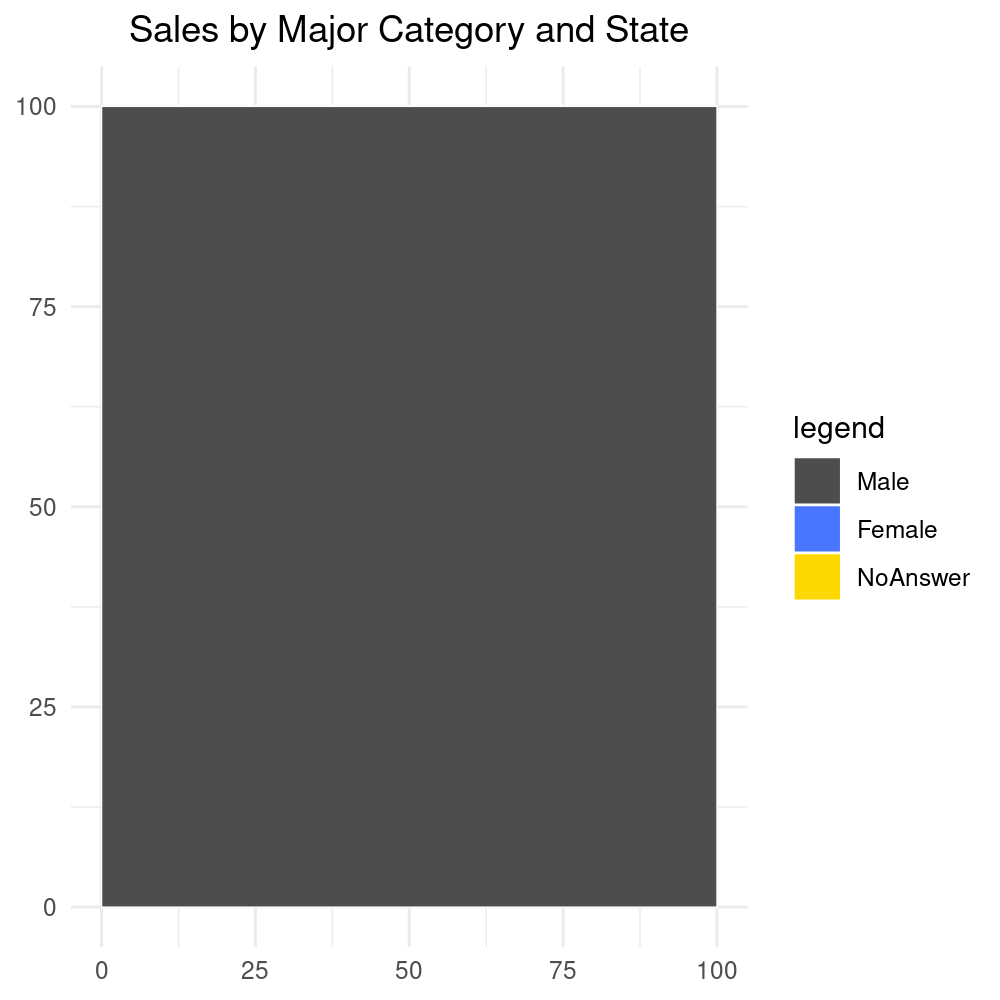

In [ ]:
%%R -w 5 -h 5 --units in -r 200

# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution
# A
# install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)

# ggplot(RDataFrame,
#  aes(x=InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion,
#   y=factor(InterventionQuestionnaire.InterventionQuestionnaireData.JobSatisfaction))) + geom_bar()

# specie <- c(rep("sorgho" , 3) , rep("poacee" , 3) , rep("banana" , 3) , rep("triticum" , 3) )
# condition <- rep(c("normal" , "stress" , "Nitrogen") , 4)
# value <- abs(rnorm(12 , 0 , 15))
# data <- data.frame(specie,condition,value)
# print(data)
# # ggplot(data, aes(fill=condition, y=value, x=specie)) + 
# #     geom_bar(position="dodge", stat="identity")
# ggplot(UsualSuspects,aes(
#     fill=InterventionQuestionnaire.InterventionQuestionnaireData.EducationQuestion,
#     y=DarkTriadScore,
#     # x=InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion)) +
#     x=InterventionQuestionnaire.InterventionQuestionnaireData.MoneyQuestion)) +
#     geom_bar(position="dodge", stat="identity") 

# # geom_bar(position="dodge", stat="identity")
# labels <- UsualSuspects %>%
#   filter(MAJOR.CATEGORY == "PERSONAL CARE") %>%
#   mutate(y = ymax - 0.01, yRange = (ymax - ymin)* 100) %>%
#   select(STATE.CODE, xmax, y, yRange) %>%
#   ungroup()

# value_labels <- data_mosaic %>%
#   select(STATE.CODE, MAJOR.CATEGORY, xmin, xmax, ymax, share) %>%
#   mutate(
#     x = ifelse(MAJOR.CATEGORY == "PERSONAL CARE", xmax, xmin),
#     y = ymax - 0.005,
#     label = paste0(round(share * 100), "%"),
#     hjust = ifelse(MAJOR.CATEGORY == "PERSONAL CARE", 1.05, -0.25)
#   )
# print(UsualSuspects$InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion)
ggplot(UsualSuspects) +  geom_rect(aes(ymin = 0, ymax = 100, xmin = 0, xmax = 100,
                fill = InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion),
                 colour = "white", size = 0.2)+
  scale_fill_manual("legend", values = c("Male" = "grey30",
                                         "Female" = "royalblue1",
                                         "NoAnswer" = "gold"))+
  theme_light()+
  # geom_text(
  #   data = labels,
  #   aes(x = 1.05, y = y, label = as.character(STATE.CODE)),
  #   hjust = 0, vjust = 1, colour = "blue",size=3
  # ) +
  # geom_text(
  #   data = value_labels,
  #   aes(x = x, y = y, label = label, hjust = hjust),
  #   vjust = 1, size = 3, alpha = 1, colour = "white"
  # ) +
  # scale_y_continuous( breaks = labels$y, limits = c(0, 1),
  #                     labels = scales::percent)+
  theme_minimal()+
  theme(axis.title=element_blank(),
        plot.title = element_text(hjust = 0.5)) + ggtitle("Sales by Major Category and State")


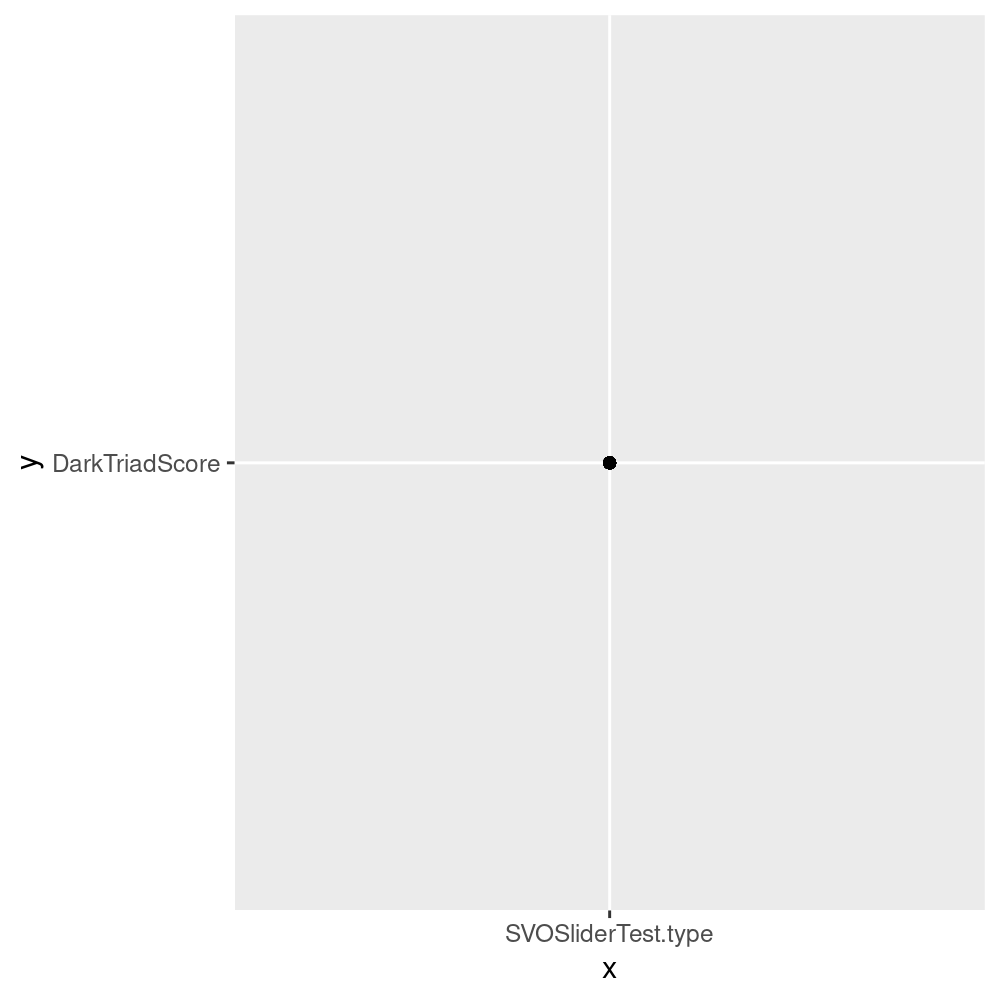

In [ ]:
%%R -i SVOAndDTRNaNDroped -w 5 -h 5 --units in -r 200


# UsualSuspects <- cbind(RDataFrameTestGroups,RDataFrameTestGroupsInterval,RDataFramekeysPre,RDataFramekeysPost)
ggplot(
    UsualSuspects) +
     aes(x="SVOSliderTest.type", y="DarkTriadScore") + geom_point()
# pn.ggsave(filename="SVOAndDTRNaNDroped_SVOSliderTest.type__DarkTriadScore_Scatter.pdf",
#           plot=SVOAndDTRNaNDroped,
#           device='pdf',
#           dpi=300,
#           height=25,
#           width=25)



In [ ]:
# mosaic(AssessInformationStatsAndPlots[a])
# mosaic(AssessInformationStatsAndPlotsMatrix)
# odd_ratio, p_value = fisher_exact(AssessInformationStatsAndPlotsMatrix)
# print('odd ratio is : ' + str(odd_ratio))
# print('p_value is : ' + str(p_value))
# odd_ratio, p_value = fisher_exact(AssessInformationStatsAndPlots[a])
# print('odd ratio is : ' + str(odd_ratio))
# print('p_value is : ' + str(p_value))
#  ! #########

#  ! #########

# plt.show()


# ! Effect and Response Variables 14 Sept 21:36 0001


In [ ]:


# (CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfFamilyName'].notnull()]
#           [CleandDataDF['selfName'].notnull()]
#           [CleandDataDF['selfPhoneNumber'].notnull()]['selfFamilyName'])

# CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherFamilyName'].notnull()]


In [ ]:

#           [CleandDataDF['otherName'].notnull()]
#           [CleandDataDF['otherPhoneNumber'].notnull()]['otherFamilyName']

# print('selfEmailAddress',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfEmailAddressRevised1'].notnull()]))
# # ! ########################
# print('selfFamilyNameRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfFamilyNameRevised'].notnull()]))
# print('selfNameRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfNameRevised'].notnull()]))
# print('selfPhoneNumberRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfPhoneNumberRevised'].notnull()]))
# print('selfTelegramIDRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfTelegramIDRevised'].notnull()]))
# # print('otherFamilyNameRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherFamilyNameRevised'].notnull()]))
# print('otherNameRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherNameRevised'].notnull()]))
# print('otherPhoneNumberRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherPhoneNumberRevised'].notnull()]))
# # print('otherEmailAddressRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherEmailAddressRevised'].notnull()]))
# print('otherTelegramIDRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherTelegramIDRevised'].notnull()]))

# # ! ########################
# print('otherEmailAddress',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherEmailAddress'].notnull()]))
# print('otherFamilyName',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherFamilyName'].notnull()]))
# print('otherName',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherName'].notnull()]))
# print('otherPhoneNumber',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherPhoneNumber'].notnull()]))
# print('otherTelegramID',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherTelegramID'].notnull()]))
# selfTelegramIDRevised
# otherEmailAddressRevised
# selfEmailAddressRevised1
# selfEmailAddressRevised2


In [ ]:
# rank some or t-test


In [ ]:
# error bar


In [ ]:
# ficsher exact


In [ ]:




Variables = {1: {'variableName': 'InitialSampleSize', 'variableValue': InitialSampleSize},
             2: {'variableName': 'SampleSizeMale', 'variableValue': SampleSizeMale},
             3: {'variableName': 'SampleSizeFemale', 'variableValue': SampleSizeFemale},
             4: {'variableName': 'sampleAgeMeanMale', 'variableValue': sampleAgeMeanMale},
             5: {'variableName': 'sampleAgeSDFemale', 'variableValue': sampleAgeSDFemale},
             5: {'variableName': 'sampleAgeSDMale', 'variableValue': sampleAgeSDMale},
             5: {'variableName': 'sampleAgeSD', 'variableValue': sampleAgeSD},
             6: {'variableName': 'ageMax', 'variableValue': ageMax},
             7: {'variableName': 'ageMin', 'variableValue': ageMin},
             8: {'variableName': 'ageMaxMale', 'variableValue': ageMaxMale},
             9: {'variableName': 'ageMinFemale', 'variableValue': ageMinFemale},
             10: {'variableName': 'CleanedSampleSize', 'variableValue': CleanedSampleSize},
             11: {'variableName': 'sampleAgeMean', 'variableValue': sampleAgeMean},
             12: {'variableName': 'noOfIndividualisticParticipants', 'variableValue': noOfIndividualisticParticipants},
             13: {'variableName': 'noOfCompetitiveParticipants', 'variableValue': noOfCompetitiveParticipants},
             14: {'variableName': 'noOfCooperativeParticipants', 'variableValue': noOfProsocialParticipants},
             15: {'variableName': 'noOfAltruisticParticipants', 'variableValue': noOfAltruisticParticipants},
             16: {'variableName': 'meanOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection', 'variableValue': meanOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection},
             17: {'variableName': 'SDOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection', 'variableValue': SDOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection},
             18: {'variableName': 'meanOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection', 'variableValue': meanOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection},
             19: {'variableName': 'SDOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection', 'variableValue': SDOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection},
             20: {'variableName': 'PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation',
                  'variableValue': PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation},
             21: {'variableName': 'PiersonrValueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation',
                  'variableValue': PiersonrValueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation},
             22: {'variableName': 'PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForOtherValuation',
                  'variableValue': PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForOtherValuation},
             23: {'variableName': 'PiersonRValueForCorrelationBetweenFirstAndSecondPartOfQuestionsforOtherValuation',
                  'variableValue': PiersonRValueForCorrelationBetweenFirstAndSecondPartOfQuestionsforOtherValuation},
             24: {'variableName': 'meanOfSelfWTPAllTwoParticipantGroupFirstQuestionSection',
                  'variableValue': meanOfSelfWTPAllTwoParticipantGroupFirstQuestionSection},
             25: {'variableName': 'SDOfSelfWTPAllTwoParticipantGroupsFirstQuestionSection',
                  'variableValue': SDOfSelfWTPAllTwoParticipantGroupsFirstQuestionSection},
             26: {'variableName': 'meanOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection',
                  'variableValue': meanOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection},
             27: {'variableName': 'SDOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection',
                  'variableValue': SDOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection},
             28: {'variableName': 'SampleSizeSexualityNoAnswer',
                  'variableValue': SampleSizeSexualityNoAnswer}
             }


In [ ]:

latex_jinja_env = jinja2.Environment(
    block_start_string='\BLOCK{',
    block_end_string='}',
    variable_start_string='\VAR{',
    variable_end_string='}',
    comment_start_string='\#{',
    comment_end_string='}',
    line_statement_prefix='%%',
    line_comment_prefix='%#',
    trim_blocks=True,
    autoescape=False,
    loader=jinja2.FileSystemLoader(os.path.abspath('.'))
)
# %%capture captured --no-stderr
template = latex_jinja_env.get_template('./jinja-template.tex')
outputTexVariables = template.render(
    Variables=Variables,  numebrOfVariables=len(Variables))
# print(outputTexVariables)
# with open("../tex/variables.tex", "w") as output:
#     output.write(outputTexVariables)


In [ ]:



reshaper = arabic_reshaper.ArabicReshaper(
    arabic_reshaper.config_for_true_type_font(
        '../font/IRTitr.ttf',
        arabic_reshaper.ENABLE_ALL_LIGATURES
    )
)


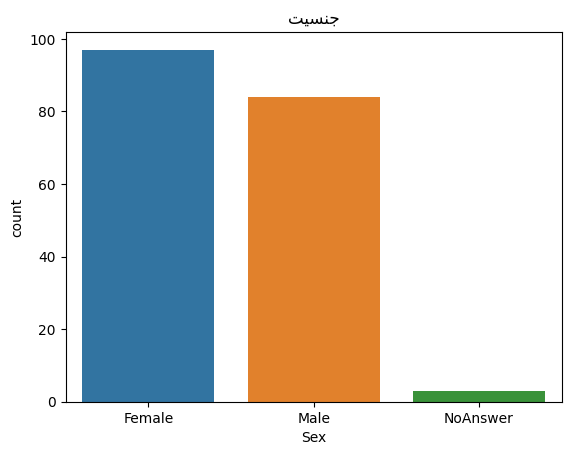

In [ ]:


PlotDFSex = CleandDataDFForPlots.copy()
PlotDF = CleandDataDFForPlots.copy()
PlotDFSex['Sex'] = PlotDF['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion']
SexualityFigPersianTitle = 'جنسیت'
SexualityFigPersianTitlereshaped_text = reshaper.reshape(
    SexualityFigPersianTitle)
SexualityFigPersianTitlebidi_text = get_display(
    SexualityFigPersianTitlereshaped_text)

plt.title(SexualityFigPersianTitlebidi_text, fontsize=12)
sns.countplot(x='Sex', data=PlotDFSex)
plt.savefig('../img/sexualityAgainstPopulation.pdf')
plt.show()


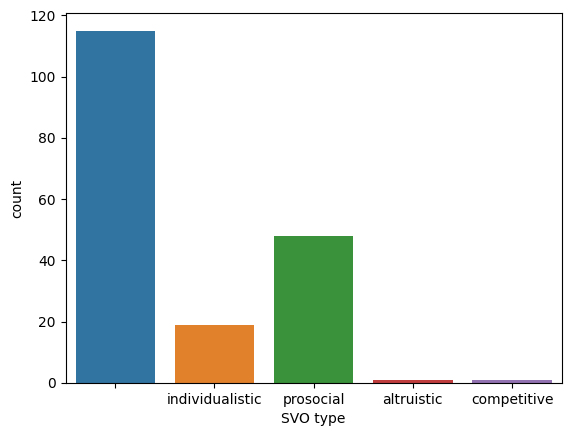

In [ ]:
PlotDFSex = CleandDataDFForPlots.copy()
PlotDF = CleandDataDFForPlots.copy()

PlotDFSVOSex = CleandDataDFForPlots.copy().dropna(subset=['SVOSliderTest.type'])
PlotDFSVOSex['SVO type'] = PlotDF['SVOSliderTest.type']
# PlotDFSVOSex['SVOScore'] = PlotDF['SVOSliderTest.svo']
PlotDFSVOSex['Sex'] = PlotDF['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion']
# PlotDF
# PlotDFDropedSVONaN = PlotDF.dropna(subset=['SVOSliderTest.type']).copy()
# SexualitySVOFigPersianTitle = 'رویکرد ارزش اجتماعی'
# SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(
#     SexualitySVOFigPersianTitle)
# SexualitySVOFigPersianTitlebidi_text = get_display(
#     SexualitySVOFigPersianTitleTitlereshaped_text)
# plt.title(SexualitySVOFigPersianTitlebidi_text, fontsize=12)
# sns.countplot(x='SVO type', hue='Sex', data=PlotDFSVOSex)
sns.countplot(x='SVO type',  data=PlotDFSVOSex)
plt.show()
plt.savefig('../img/sexualityAndSVOAgainstPopulation.pdf')


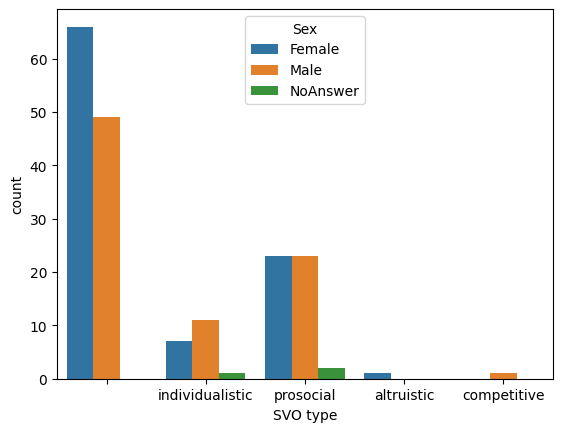

In [ ]:
PlotDFSex = CleandDataDFForPlots.copy()
PlotDF = CleandDataDFForPlots.copy()

PlotDFSVOSex = CleandDataDFForPlots.copy().dropna(subset=['SVOSliderTest.type'])
PlotDFSVOSex['SVO type'] = PlotDF['SVOSliderTest.type']
# PlotDFSVOSex['SVOScore'] = PlotDF['SVOSliderTest.svo']
PlotDFSVOSex['Sex'] = PlotDF['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion']
# PlotDF
# PlotDFDropedSVONaN = PlotDF.dropna(subset=['SVOSliderTest.type']).copy()
# SexualitySVOFigPersianTitle = 'رویکرد ارزش اجتماعی'
# SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(
#     SexualitySVOFigPersianTitle)
# SexualitySVOFigPersianTitlebidi_text = get_display(
#     SexualitySVOFigPersianTitleTitlereshaped_text)
# plt.title(SexualitySVOFigPersianTitlebidi_text, fontsize=12)
# sns.countplot(x='SVO type', hue='Sex', data=PlotDFSVOSex)
sns.countplot(x='SVO type',  hue='Sex',  data=PlotDFSVOSex)
plt.show()
plt.savefig('../img/sexualityAndSVOAgainstPopulation.pdf')


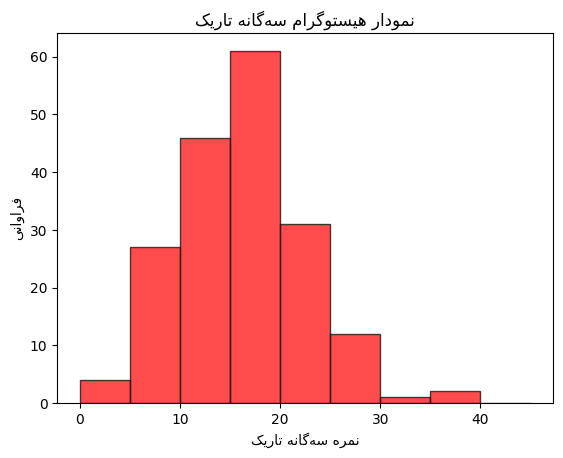

In [ ]:


# داده های به دترد نخود
# آنهایی که تمت شدند
# چه ویژگی ایی داشته اند
# چه کساتنی
# PlotDF.rename(columns = {'SVOSliderTest.type':'SVO type'}, inplace = True)
PlotDFDTR = CleandDataDFForPlots.copy()
PlotDFDTR['Sex'] = PlotDFDTR['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion']
SexualitySVOFigPersianTitle = 'نمودار هیستوگرام سه‌گانه تاریک'
SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(
    SexualitySVOFigPersianTitle)
SexualitySVOFigPersianTitlebidi_text = get_display(
    SexualitySVOFigPersianTitleTitlereshaped_text)
var02_1 = 'نمره سه‌گانه تاریک'
var02_2 = arabic_reshaper.reshape(var02_1)
var02_3 = get_display(var02_2)
var03_1 = 'فراوانی'
var03_2 = arabic_reshaper.reshape(var03_1)
var03_3 = get_display(var03_2)

plt.title(SexualitySVOFigPersianTitlebidi_text, fontsize=12)
bins = list(range(0, 50, 5))
plt.hist((PlotDFDTR['DarkTriadScore'].dropna()), bins,
         facecolor='r', alpha=0.7, edgecolor='k', linewidth=1)

# plt.xlabel("DarkTriadScore")
plt.xlabel(var02_3)
plt.ylabel(var03_3)
# sns.countplot(x='DarkTriadScore',data=PlotDF)
plt.show()
plt.savefig('../img/SexToDTR.pdf')


In [ ]:


# # PlotDF.rename(columns = {'SVOSliderTest.type':'SVO type'}, inplace = True)

# SexualitySVOFigPersianTitle = 'نمودار پراکنش ارزش گذاری مجموعه‌داده نسبت به رویکرد ارزش اجتماعی'
# SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(
#     SexualitySVOFigPersianTitle)
# SexualitySVOFigPersianTitlebidi_text = get_display(
#     SexualitySVOFigPersianTitleTitlereshaped_text)
# plt.title(SexualitySVOFigPersianTitlebidi_text, fontsize=12)
# SVOAndDTRNaNDroped = CleandDataDFForPlots.dropna(
#     subset=['DarkTriadScore', 'SVOScore'])
# print(SVOAndDTRNaNDroped.loc[:, ['SVOScore', 'DarkTriadScore']])
# print(len(SVOAndDTRNaNDroped.loc[:, ['SVOScore', 'DarkTriadScore']]))
# # sns.countplot(x='SVO type', data=PlotDF)
# var02_1 = 'نمره رویکرد ارزش اجتماعی'
# var02_2 = arabic_reshaper.reshape(var02_1)
# var02_3 = get_display(var02_2)
# var03_1 = 'نمره پرسشنامه سه‌گانه تاریک'
# var03_2 = arabic_reshaper.reshape(var03_1)
# var03_3 = get_display(var03_2)
# plt.xlabel(var02_3)
# plt.ylabel(var03_3)
# plt.scatter(pd.to_numeric(SVOAndDTRNaNDroped['SVOScore']), pd.to_numeric(
#     SVOAndDTRNaNDroped['DarkTriadScore']))
# # plt.scatter(SVOAndDTRNaNDroped[0:19])
# # list(SVOAndDTRNaNDroped.iloc[:,0].astype(float))
# # list(SVOAndDTRNaNDroped.iloc[:,0])
# plt.show()

# plt.savefig('../img/ScatterSVOScoreDarkTriadScore.pdf')


In [ ]:


# PlotDF.rename(columns = {'SVOSliderTest.type':'SVO type'}, inplace = True)

# SexualitySVOFigPersianTitle = 'نمودار پراکنش ارزش گذاری مجموعه‌داده نسبت به رویکرد ارزش اجتماعی'
# SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(
#     SexualitySVOFigPersianTitle)
# SexualitySVOFigPersianTitlebidi_text = get_display(
#     SexualitySVOFigPersianTitleTitlereshaped_text)
# plt.title(SexualitySVOFigPersianTitlebidi_text, fontsize=12)
# SVOAndDTRNaNDroped = CleandDataDFForPlots.dropna(
#     subset=['DarkTriadScore', 'SVOScore'])
# print(SVOAndDTRNaNDroped.loc[:, ['SVOScore', 'DarkTriadScore']])
# print(len(SVOAndDTRNaNDroped.loc[:, ['SVOScore', 'DarkTriadScore']]))
# var02_1 = 'نمره رویکرد ارزش اجتماعی'
# var02_2 = arabic_reshaper.reshape(var02_1)
# var02_3 = get_display(var02_2)
# var03_1 = 'نمره پرسشنامه سه‌گانه تاریک'
# var03_2 = arabic_reshaper.reshape(var03_1)
# var03_3 = get_display(var03_2)
# plt.xlabel(var02_3)
# plt.ylabel(var03_3)
# plt.scatter(pd.to_numeric(SVOAndDTRNaNDroped['SVOScore']), pd.to_numeric(
#     SVOAndDTRNaNDroped['DarkTriadScore']))
# plt.savefig('../img/ScatterSVOScoreDarkTriadScore.pdf')
# pi = robjects.r['pi']
# type(pi)
# mtcars = data(datasets).fetch('mtcars')['mtcars']
# print(mtcars)

# grdevices = importr('grDevices')
# grdevices.png(file="../img/mtcars.png", width=1024, height=512)
# datasets = importr('datasets')
# mtcars = data(datasets).fetch('mtcars')['mtcars']

# pp = (ggplot2.ggplot(mtcars) +
#       ggplot2.aes_string(x='wt', y='mpg', col='factor(cyl)') +
#       ggplot2.geom_point())
# pp.plot()


In [ ]:

# SVOAndDTRNaNDroped['Sex'] = SVOAndDTRNaNDroped['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion']


# from plotnine import ggplot, aes, geom_boxplot

# (pn.ggplot(CleandDataDFForPlots)
#  + aes(x="factor(SVOSliderTest.type)", y="DarkTriadScore")
#  + geom_boxplot()
#  + geom_point()
#  )
# pn.ggplot(SVOAndDTRNaNDroped) + aes(x="SVOSliderTest.type",
#                                     y="DarkTriadScore") + geom_point()
# (
#   ggplot(huron)
#   + aes(x="factor(decade)", y="level")
#   + geom_boxplot()
#   + geom_point()
# )
# CleandDataDFForPlots['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']
